<font size = 6 color = 'green'> CÁLCULO DE PSI

<font size = 4> Autor original: Ing. Manuel Figueroa Culqui (docente del curso "METEOROLOGÍA TROPICAL" - UNALM)

<font size = 4> Modificado por: Est. Kevin Campos Sánchez

In [2]:
!pip install 'xarray==0.19.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
##### CONFIGURACIÓN DE ENTORNO #####
import numpy as np, matplotlib.pyplot as plt, xarray as xr, pandas as pd, os, sys
from google.colab import drive        # Conectar Google drive
drive.mount('/content/drive/')

path = '/content/drive/MyDrive/Trabajos_UNALM/M. Tropical/P3_MTropical/'      # Directorio de trabajo
os.chdir(path)         # Seleccionar carpeta de trabajo
sys.path.append(path)  # Agregar carpeta de metadata al path del entorno => permite leer módulos en esta carpeta

ds = xr.open_dataset(path + 'v_clim_NCEP-NCAR_81-10.nc', decode_times=False)   # Lectura del dataset
ds['T']=pd.date_range('2000-01-01', '2000-12-31', freq='MS')                   # Asignamos DateTimeIndex mensual
vbracket = ds.v.mean(dim='X')                                                  # Promedio longitudinal del viento meridional
vbracket_zeros = vbracket.fillna(0.)                                           # Rellenan NaN con cero

# Cálculo del PSI
a, g, coslat = 6.373E6, 9.8, np.cos(np.deg2rad(ds.Y))
psi = 2*np.pi*a*coslat/g * vbracket_zeros.cumulative_integrate(coord='P') / 1E9 * 100

psi_season = psi.groupby(ds.T.dt.season).mean(dim='T')      # Cálculo de promedios estacionales

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


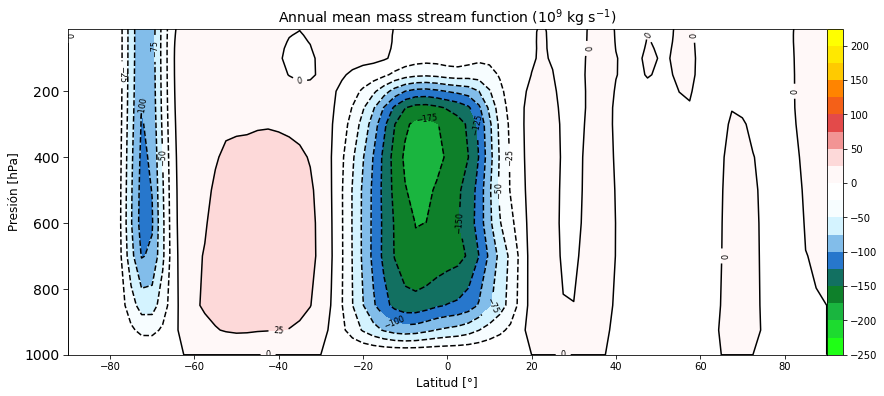

In [128]:
# df = psi_season.mean('season')  # Anual
df = psi_season.sel(season = 'JJA')  # Estacional

fig, ax = plt.subplots(1, figsize=(16,6))

from matplotlib.colors import LinearSegmentedColormap   # Paleta de colores
colors_anom = ['#1FFF15', '#1CBE43', '#0B7124', '#1D6FC9', '#C0EDFF', '#FFFFFF', 
               '#FFFFFF', '#FCC7C7', '#E14242', '#FF7100', '#FFD500', '#FFFF00']
cmap = LinearSegmentedColormap.from_list('colors_anom', colors_anom, N = 80)
cmap.set_bad(color = '#EBEBEB')   # Seleccionar color de nan

df.plot.contourf(ax = ax, x = 'Y', levels = range(-250, 250, 25), 
                        cmap = cmap, cbar_kwargs = {'pad':0.0}, add_labels = False)
CS = df.plot.contour(ax = ax, x = 'Y', levels = range(-250, 250, 25),
                            colors = 'k', add_labels = False)
ax.clabel(CS, CS.levels, inline=True, fontsize=8)
ax.set_title('Annual mean mass stream function (10$^9$ kg s$^{-1}$)', fontsize = 14)
ax.set_xlabel('Latitud [°]', fontsize = 12); ax.set_ylabel('Presión [hPa]', fontsize = 12); ax.invert_yaxis()
ax.tick_params(axis = 'y', direction='out', length = 5, labelcolor='k', labelsize = 14, labelrotation = 0)